In [132]:
#Import Libraries
import pandas as pd
import numpy as np
import sqlite3
import dateutil.parser as parser
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

In [133]:
#Create Database Connection
DBName = '../Data/yelp_project.db'
conn=sqlite3.connect(DBName)
cursor = conn.cursor()

In [134]:
#Read Business Data
query = "SELECT b.business_id, r.stars, attributes, date, useful, cool, funny, postal_code FROM review r JOIN \
business b USING (business_id) WHERE CAST(postal_code AS int)>=15000 AND CAST(postal_code AS int)<15500"
business_data = pd.read_sql_query(query,conn)
business_data

,business_id,stars,attributes,date,useful,cool,funny,postal_code
0,cnGIivYRLxpF7tBVR_JwWA,1,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-02-01,0,0,0,15071
1,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-07-04,0,0,0,15071
2,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-07-28,0,0,0,15071
3,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-08-06,0,0,0,15071
4,P3LisOj7DktgGa7C5FYpnA,1,['BusinessAcceptsCreditCards: True'],2015-09-19,4,0,0,15237
5,P3LisOj7DktgGa7C5FYpnA,2,['BusinessAcceptsCreditCards: True'],2014-01-29,4,1,0,15237
6,P3LisOj7DktgGa7C5FYpnA,3,['BusinessAcceptsCreditCards: True'],2016-12-05,0,0,0,15237
7,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2011-11-19,2,0,0,15237
8,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2013-10-05,0,0,0,15237
9,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2014-01-12,2,0,0,15237


In [135]:
#Split the attributes one per row
attributes_splitted = pd.concat([pd.Series(row['business_id'],row['attributes'].split(',')) for _, row in business_data.dropna().iterrows()]).reset_index()
attributes_splitted.columns = ['Attributes', 'business_id']

In [136]:
attributes_splitted

,Attributes,business_id
0,['AcceptsInsurance: False',cnGIivYRLxpF7tBVR_JwWA
1,'BusinessAcceptsCreditCards: True',cnGIivYRLxpF7tBVR_JwWA
2,"""BusinessParking: {'garage': False",cnGIivYRLxpF7tBVR_JwWA
3,'street': False,cnGIivYRLxpF7tBVR_JwWA
4,'validated': False,cnGIivYRLxpF7tBVR_JwWA
5,'lot': True,cnGIivYRLxpF7tBVR_JwWA
6,"'valet': False}""",cnGIivYRLxpF7tBVR_JwWA
7,'ByAppointmentOnly: True',cnGIivYRLxpF7tBVR_JwWA
8,"""HairSpecializesIn: {'coloring': False",cnGIivYRLxpF7tBVR_JwWA
9,'africanamerican': False,cnGIivYRLxpF7tBVR_JwWA


In [137]:
#Get Restaurants with price
restprice = attributes_splitted[attributes_splitted.Attributes.str.contains("restaurantspricerange", case=False)].reset_index()
restprice

,index,Attributes,business_id
0,16,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA
1,33,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA
2,50,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA
3,67,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA
4,124,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w
5,179,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w
6,234,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w
7,289,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w
8,344,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w
9,399,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w


In [138]:
#Extract price range and remove non-numerical characters
restprice['Price'] = [ pd.to_numeric(re.sub(r"[\[\]' ]", "", r.split(":")[1])) for r in restprice.Attributes]
restprice

,index,Attributes,business_id,Price
0,16,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA,3
1,33,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA,3
2,50,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA,3
3,67,'RestaurantsPriceRange2: 3'],cnGIivYRLxpF7tBVR_JwWA,3
4,124,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w,2
5,179,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w,2
6,234,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w,2
7,289,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w,2
8,344,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w,2
9,399,'RestaurantsPriceRange2: 2',93otbGHE0s0m-lU1osvg9w,2


In [139]:
business_price = restprice[['business_id', 'Price']]
business_price

,business_id,Price
0,cnGIivYRLxpF7tBVR_JwWA,3
1,cnGIivYRLxpF7tBVR_JwWA,3
2,cnGIivYRLxpF7tBVR_JwWA,3
3,cnGIivYRLxpF7tBVR_JwWA,3
4,93otbGHE0s0m-lU1osvg9w,2
5,93otbGHE0s0m-lU1osvg9w,2
6,93otbGHE0s0m-lU1osvg9w,2
7,93otbGHE0s0m-lU1osvg9w,2
8,93otbGHE0s0m-lU1osvg9w,2
9,93otbGHE0s0m-lU1osvg9w,2


In [140]:
#Left Join of both df
business_data_Price = business_data.join(business_price, how = 'left', rsuffix='_bp')

In [141]:
years=[pd.to_datetime(row['date']).year for _, row in business_data_Price.iterrows()]

In [142]:
len(years)

176505

In [143]:
business_data_Price['Years'] = years
business_data_Price

,business_id,stars,attributes,date,useful,cool,funny,postal_code,business_id_bp,Price,Years
0,cnGIivYRLxpF7tBVR_JwWA,1,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-02-01,0,0,0,15071,cnGIivYRLxpF7tBVR_JwWA,3.0,2016
1,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-07-04,0,0,0,15071,cnGIivYRLxpF7tBVR_JwWA,3.0,2016
2,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-07-28,0,0,0,15071,cnGIivYRLxpF7tBVR_JwWA,3.0,2016
3,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-08-06,0,0,0,15071,cnGIivYRLxpF7tBVR_JwWA,3.0,2016
4,P3LisOj7DktgGa7C5FYpnA,1,['BusinessAcceptsCreditCards: True'],2015-09-19,4,0,0,15237,93otbGHE0s0m-lU1osvg9w,2.0,2015
5,P3LisOj7DktgGa7C5FYpnA,2,['BusinessAcceptsCreditCards: True'],2014-01-29,4,1,0,15237,93otbGHE0s0m-lU1osvg9w,2.0,2014
6,P3LisOj7DktgGa7C5FYpnA,3,['BusinessAcceptsCreditCards: True'],2016-12-05,0,0,0,15237,93otbGHE0s0m-lU1osvg9w,2.0,2016
7,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2011-11-19,2,0,0,15237,93otbGHE0s0m-lU1osvg9w,2.0,2011
8,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2013-10-05,0,0,0,15237,93otbGHE0s0m-lU1osvg9w,2.0,2013
9,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2014-01-12,2,0,0,15237,93otbGHE0s0m-lU1osvg9w,2.0,2014


In [144]:
zip_matrix = business_data_Price[['postal_code', 'Years', 'stars', 'useful', 'funny', 'cool', 'Price']]
stars = zip_matrix.stars
zip_matrix = pd.get_dummies(zip_matrix, columns = ["stars"])
zip_matrix['stars'] = stars
zip_matrix

,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,stars_4,stars_5,stars
0,15071,2016,0,0,0,3.0,1.0,0.0,0.0,0.0,0.0,1
1,15071,2016,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,5
2,15071,2016,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,5
3,15071,2016,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,5
4,15237,2015,4,0,0,2.0,1.0,0.0,0.0,0.0,0.0,1
5,15237,2014,4,0,1,2.0,0.0,1.0,0.0,0.0,0.0,2
6,15237,2016,0,0,0,2.0,0.0,0.0,1.0,0.0,0.0,3
7,15237,2011,2,0,0,2.0,0.0,0.0,0.0,0.0,1.0,5
8,15237,2013,0,0,0,2.0,0.0,0.0,0.0,0.0,1.0,5
9,15237,2014,2,0,0,2.0,0.0,0.0,0.0,0.0,1.0,5


In [138]:
zip_aggregated = zip_matrix.groupby(['postal_code', 'Years']).agg(pd.Series.mean)
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.500000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.500000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.066667  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  2.000000  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.217391  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.311111  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  1.949153  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.333333  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.750000  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.703704  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.697368  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.681159  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.884615  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.812734  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.815348  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.785714  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.870968  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.949153  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.875000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.695652  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.529412  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

pandas.core.frame.DataFrame

In [143]:
#business_price_zip = business_price.join(business_data, how = "inner", rsuffix="_bp")
business_price_zip = business_data_Price[['business_id','Price', 'postal_code', 'Years']].drop_duplicates()
price_zip = business_price_zip[['postal_code', 'Price', 'Years']]
price_zip

,postal_code,Price,Years
0,15071,3.0,2016
4,15237,2.0,2015
5,15237,2.0,2014
6,15237,2.0,2016
7,15237,2.0,2011
8,15237,2.0,2013
12,15212,2.0,2013
13,15212,2.0,2014
16,15212,2.0,2015
21,15212,2.0,2016


In [144]:
average_price_zip = price_zip.groupby(['postal_code','Years']).agg(pd.Series.mean)

In [145]:
average_price_zip

Price
postal_code Years          
15003       2008   3.000000
            2009   2.000000
            2010   2.400000
            2011   2.400000
            2012   2.111111
            2013   1.888889
            2014   2.071429
            2015   2.076923
            2016   2.117647
            2017   2.666667
15009       2014   2.000000
            2015   2.000000
            2016   2.000000
15012       2015   1.000000
15015       2011   2.000000
            2012   1.500000
            2013   2.000000
            2014   1.000000
            2015   2.000000
            2016   1.000000
15017       2007   1.750000
            2008   1.500000
            2009   1.818182
            2010   1.800000
            2011   1.650000
            2012   1.682540
            2013   1.814286
            2014   1.773810
            2015   1.773585
            2016   1.750000
...                     ...
15321       2014   2.000000
            2015   1.600000
            2016   1.714286
            2017   2.000000
15332       2006   2.000000
            2010   2.000000
            2011   2.000000
            2012   2.000000
            2013   1.500000
            2014   1.750000
            2015   1.666667
            2016   1.571429
            2017   2.000000
15339       2011   2.000000
            2012   2.000000
            2013   2.000000
            2014   2.000000
            2015   2.000000
            2016   2.000000
15342       2011   1.666667
            2012   1.000000
            2013   1.250000
            2014   1.250000
            2015   1.833333
            2016   1.833333
15367       2012   1.000000
            2013   1.500000
            2014   2.000000
            2015   1.500000
            2016   1.500000

[1030 rows x 1 columns]

In [146]:
zip_aggregated['Price'] = average_price_zip

In [147]:
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [166]:
average_reviews_zip = business_data_Price.groupby(['postal_code','Years']).agg(pd.Series.count)
average_reviews_zip = average_reviews_zip['business_id']

business_id  stars  attributes  date  useful  cool  funny  \
postal_code Years                                                              
15003       2008             2      2           2     2       2     2      2   
            2009             2      2           2     2       2     2      2   
            2010             8      8           8     8       8     8      8   
            2011            15     15          15    15      15    15     15   
            2012            20     20          18    20      20    20     20   
            2013            25     25          23    25      25    25     25   
            2014            34     34          30    34      34    34     34   
            2015            61     61          56    61      61    61     61   
            2016            72     72          71    72      72    72     72   
            2017             4      4           4     4       4     4      4   
15009       2014             1      1           0     1       1     1      1   
            2015             1      1           0     1       1     1      1   
            2016             1      1           0     1       1     1      1   
15012       2015             3      3           3     3       3     3      3   
15015       2011             1      1           1     1       1     1      1   
            2012             2      2           2     2       2     2      2   
            2013             1      1           1     1       1     1      1   
            2014             1      1           1     1       1     1      1   
            2015             1      1           1     1       1     1      1   
            2016             2      2           2     2       2     2      2   
15017       2007             4      4           4     4       4     4      4   
            2008             3      3           3     3       3     3      3   
            2009            12     12          12    12      12    12     12   
            2010            27     27          26    27      27    27     27   
            2011            76     76          75    76      76    76     76   
            2012           138    138         137   138     138   138    138   
            2013           234    234         232   234     234   234    234   
            2014           267    267         261   267     267   267    267   
            2015           417    417         406   417     417   417    417   
            2016           602    602         579   602     602   602    602   
...                        ...    ...         ...   ...     ...   ...    ...   
15321       2014            26     26          26    26      26    26     26   
            2015            31     31          31    31      31    31     31   
            2016            59     59          59    59      59    59     59   
            2017             1      1           1     1       1     1      1   
15332       2006             1      1           1     1       1     1      1   
            2010             1      1           1     1       1     1      1   
            2011             2      2           2     2       2     2      2   
            2012             7      7           7     7       7     7      7   
            2013             8      8           8     8       8     8      8   
            2014            16     16          16    16      16    16     16   
            2015            25     25          25    25      25    25     25   
            2016            18     18          18    18      18    18     18   
            2017             1      1           1     1       1     1      1   
15339       2011             2      2           2     2       2     2      2   
            2012             1      1           1     1       1     1      1   
            2013             2      2           2     2       2     2      2   
            2014             1      1           1     1       1     1      1   
            2015   

In [200]:
review_byzip = business_data_Price.groupby(['postal_code', 'Years']).count()

In [199]:
total_reviews = business_data_Price.groupby(['Years']).count().business_id
total_reviews

31

In [212]:
review_byzip = review_byzip.reset_index()[['postal_code','Years','business_id']]
review_byzip

,postal_code,Years,business_id
0,15003,2008,2
1,15003,2009,2
2,15003,2010,8
3,15003,2011,15
4,15003,2012,20
5,15003,2013,25
6,15003,2014,34
7,15003,2015,61
8,15003,2016,72
9,15003,2017,4


In [217]:
prop_reviews = [ float(review_byzip.ix[i]['business_id'])/total_reviews[review_byzip.ix[i]['Years']] for i in range(len(review_byzip))]

In [219]:
zip_aggregated['reviews_perc'] = prop_reviews

In [220]:
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [249]:
flatten_zip = zip_aggregated.reset_index()
pd.to_numeric(flatten_zip[(flatten_zip['postal_code']=='15232')&(flatten_zip['Years']==2007)].stars)

791    3.923077
Name: stars, dtype: float64

In [253]:
avg_review_prev1 = [flatten_zip[(flatten_zip['postal_code']==flatten_zip.ix[i]['postal_code'])&(flatten_zip['Years']==(flatten_zip.ix[i]['Years']-1))]['stars'].values for i in range(len(flatten_zip))]

In [260]:
zip_aggregated['prev_stars'] = avg_review_prev1
zip_aggregated['prev_stars'] = zip_aggregated['prev_stars'].str.get(0)
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [261]:
#save to pickle
import pickle
output_file = open("Feature_Matrix_onlyYelp.dat","wb")
pickle.dump(zip_aggregated, output_file)
output_file.close()

In [264]:
#Integrate Zillow
zip_price = pd.read_csv("../Data/Zip_MedianValuePerSqft_AllHomes.csv")

#Select only Pittsburgh
pittsburgh_data_price = zip_price[(zip_price.RegionName>=15000)&(zip_price.RegionName<15500)]

#Select the RegionName and the columns with year
pittsburgh_data_byYear = pd.concat([pittsburgh_data_price.ix[:,1], pittsburgh_data_price[pittsburgh_data_price.columns[7:]]], axis = 1)

#Melt the dataframe to transform the columns into rows
flat_zip = pd.melt(pittsburgh_data_byYear, id_vars="RegionName", var_name="Date", value_name="MedSqft")
flat_zip

,RegionName,Date,MedSqft
0,15301,1996-04,54.0
1,15237,1996-04,69.0
2,15108,1996-04,65.0
3,15068,1996-04,56.0
4,15235,1996-04,47.0
5,15317,1996-04,68.0
6,15221,1996-04,37.0
7,15206,1996-04,33.0
8,15401,1996-04,40.0
9,15001,1996-04,59.0


In [265]:
#Extract only the years
years = [flat_zip.Date.ix[i].split('-')[0] for i in range(len(flat_zip))]

#Add to df
flat_zip['Years'] = years

#Select only these columns
flat_zip = flat_zip[['RegionName', 'Years', 'MedSqft']]

#Group by and aggregate by median
med_zip = flat_zip.groupby(['RegionName', 'Years']).median()

#Flatten the table
med_zip = med_zip.reset_index()
med_zip

,RegionName,Years,MedSqft
0,15001,1996,61.0
1,15001,1997,62.0
2,15001,1998,65.0
3,15001,1999,67.0
4,15001,2000,69.0
5,15001,2001,73.0
6,15001,2002,75.5
7,15001,2003,76.5
8,15001,2004,81.0
9,15001,2005,84.5


In [287]:
Med_price_sqft = [med_zip[(med_zip['RegionName']==int(flatten_zip.ix[i]['postal_code']))&(med_zip['Years']==str(flatten_zip.ix[i]['Years']))]['MedSqft'].values for i in range(len(flatten_zip))]

In [288]:
Med_price_sqft

[array([ 57.]),
 array([ 55.5]),
 array([ 57.5]),
 array([ 54.]),
 array([ 55.5]),
 array([ 57.]),
 array([ 57.]),
 array([ 58.]),
 array([ 65.]),
 array([ 66.]),
 array([ 104.5]),
 array([ 111.]),
 array([ 116.]),
 array([ 75.5]),
 array([ 117.]),
 array([ 115.5]),
 array([ 119.]),
 array([ 126.5]),
 array([ 133.]),
 array([ 143.5]),
 array([ 96.]),
 array([ 94.]),
 array([ 93.]),
 array([ 97.]),
 array([ 98.]),
 array([ 98.]),
 array([ 101.]),
 array([ 104.]),
 array([ 109.5]),
 array([ 115.5]),
 array([ 119.]),
 array([], dtype=float64),
 array([ 91.]),
 array([ 90.5]),
 array([ 91.]),
 array([ 92.]),
 array([ 96.5]),
 array([ 99.]),
 array([ 100.]),
 array([ 102.5]),
 array([ 54.5]),
 array([ 53.]),
 array([ 55.]),
 array([ 54.]),
 array([ 54.]),
 array([ 54.]),
 array([ 57.]),
 array([ 63.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 a

In [289]:
zip_aggregated['MedPrice_sqft'] = Med_price_sqft
zip_aggregated['MedPrice_sqft'] = zip_aggregated['MedPrice_sqft'].str.get(0)
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [291]:
zip_aggregated.columns = [u'useful', u'funny', u'cool', u'Price', u'stars_1', u'stars_2',
       u'stars_3', u'stars_4', u'stars_5', u'stars', u'reviews_perc',
       u'prev_stars', u'MedPrice_sqft(t)']

In [292]:
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [293]:
#For t=t-1
t=-1
Med_price_sqft_tminus1 = [med_zip[(med_zip['RegionName']==int(flatten_zip.ix[i]['postal_code']))&(med_zip['Years']==str(flatten_zip.ix[i]['Years']+t))]['MedSqft'].values for i in range(len(flatten_zip))]

In [294]:
#For t=t-2
t=-2
Med_price_sqft_tminus2 = [med_zip[(med_zip['RegionName']==int(flatten_zip.ix[i]['postal_code']))&(med_zip['Years']==str(flatten_zip.ix[i]['Years']+t))]['MedSqft'].values for i in range(len(flatten_zip))]

In [295]:
#For t=t+1
t=1
Med_price_sqft_tplus1 = [med_zip[(med_zip['RegionName']==int(flatten_zip.ix[i]['postal_code']))&(med_zip['Years']==str(flatten_zip.ix[i]['Years']+t))]['MedSqft'].values for i in range(len(flatten_zip))]

In [300]:
zip_aggregated['MedPrice_sqft_tminus1'] = Med_price_sqft_tminus1
zip_aggregated['MedPrice_sqft_tminus1'] = zip_aggregated['MedPrice_sqft_tminus1'].str.get(0)

zip_aggregated['MedPrice_sqft_tminus2'] = Med_price_sqft_tminus2
zip_aggregated['MedPrice_sqft_tminus2'] = zip_aggregated['MedPrice_sqft_tminus2'].str.get(0)

zip_aggregated['MedPrice_sqft_tplus1'] = Med_price_sqft_tplus1
zip_aggregated['MedPrice_sqft_tplus1'] = zip_aggregated['MedPrice_sqft_tplus1'].str.get(0)

zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [301]:
output_file = open("Feature_Matrix_complete.dat","wb")
pickle.dump(zip_aggregated, output_file)
output_file.close()

In [302]:
zip_aggregated.to_csv("Feature_Matrix_Yelp_Complete.csv")

In [3]:
input_file = open("Feature_Matrix_complete.dat","rb")
zip_aggregated = pickle.load(input_file)
input_file.close()

In [4]:
zip_aggregated

useful     funny      cool     Price   stars_1   stars_2  \
postal_code Years                                                               
15003       2008   2.000000  0.500000  2.000000  3.000000  0.000000  0.000000   
            2009   0.500000  0.000000  0.500000  2.000000  0.000000  0.000000   
            2010   1.625000  0.375000  0.375000  2.400000  0.000000  0.000000   
            2011   1.200000  0.200000  0.466667  2.400000  0.066667  0.000000   
            2012   1.800000  0.450000  0.800000  2.111111  0.150000  0.100000   
            2013   0.840000  0.560000  0.640000  1.888889  0.080000  0.120000   
            2014   0.764706  0.176471  0.205882  2.071429  0.058824  0.029412   
            2015   0.901639  0.327869  0.475410  2.076923  0.098361  0.049180   
            2016   0.319444  0.083333  0.194444  2.117647  0.041667  0.041667   
            2017   0.000000  0.000000  0.000000  2.666667  0.000000  0.250000   
15009       2014   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15012       2015   0.333333  0.000000  0.000000  1.000000  0.000000  0.000000   
15015       2011   1.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  0.500000  1.000000  1.500000  0.000000  0.000000   
            2013   0.000000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2014   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
            2015   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
            2016   0.500000  0.500000  0.000000  1.000000  0.500000  0.000000   
15017       2007   1.750000  0.250000  0.250000  1.750000  0.000000  0.000000   
            2008   0.666667  0.000000  0.000000  1.500000  0.000000  0.333333   
            2009   1.833333  1.166667  0.916667  1.818182  0.166667  0.250000   
            2010   1.074074  0.296296  0.296296  1.800000  0.074074  0.037037   
            2011   1.276316  0.434211  0.500000  1.650000  0.144737  0.078947   
            2012   1.239130  0.405797  0.318841  1.682540  0.137681  0.101449   
            2013   1.175214  0.337607  0.320513  1.814286  0.153846  0.145299   
            2014   0.977528  0.202247  0.288390  1.773810  0.198502  0.082397   
            2015   0.666667  0.139089  0.263789  1.773585  0.179856  0.103118   
            2016   0.536545  0.139535  0.272425  1.750000  0.191030  0.131229   
...                     ...       ...       ...       ...       ...       ...   
15321       2014   0.923077  0.115385  0.346154  2.000000  0.115385  0.038462   
            2015   2.903226  1.838710  2.516129  1.600000  0.032258  0.032258   
            2016   0.271186  0.016949  0.101695  1.714286  0.033898  0.016949   
            2017   0.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
15332       2006   1.000000  0.000000  0.000000  2.000000  0.000000  0.000000   
            2010   9.000000  3.000000  9.000000  2.000000  0.000000  0.000000   
            2011   1.500000  0.000000  1.000000  2.000000  0.000000  0.000000   
            2012   1.000000  0.428571  0.571429  2.000000  0.000000  0.000000   
            2013   0.875000  0.000000  0.125000  1.500000  0.250000  0.000000   
            2014   1.687500  0.375000  1.000000  1.750000  0.000000  0.062500   
            2015   0.360000  0.000000  0.120000  1.666667  0.080000  0.280000   
            2016   0.166667  0.000000  0.055556  1.571429  0.055556  0.166667   
            2017   0.000000  0.000000  0.000000  2.000000  1.000000  0.000000   
15339       2011   2.000000  0.500000  1.000000  2.000000  0.000000  0.000000   
            2012   0.000000  1.000000  0.000000  2.000000  0.000000  0.000000   
            2013   0.000000  0.500000  0.500000  2.000000  0.000000  0.500000   
            2014   0.000000  0.000000  0.000000  2.0

In [38]:
t=-1
Growth_Y2Y = [math.log(zip_aggregated.ix[i]['MedPrice_sqft_tplus1']/zip_aggregated.ix[i]['MedPrice_sqft(t)']) for i in range(len(zip_aggregated))]
#Growth_Y2Y = [zip_aggregated[(med_zip['RegionName']==int(flatten_zip.ix[i]['postal_code']))&(med_zip['Years']==str(flatten_zip.ix[i]['Years']+t))]['MedSqft'].values for i in range(len(flatten_zip))]
Growth_Y2Y

[-0.026668247082161298,
 0.035401927050916,
 -0.06280090123903036,
 0.027398974188114347,
 0.02666824708216127,
 0.0,
 0.01739174271186924,
 0.1139442593492177,
 0.01526747213078838,
 nan,
 0.06034312990746843,
 0.044059989794030495,
 0.004301081899390702,
 0.06412452816953856,
 -0.012903404835907841,
 0.02985296314968113,
 0.061118815056045536,
 0.05010682005417877,
 0.07598590697792205,
 0.034249923043078445,
 -0.02105340919783238,
 -0.010695289116747919,
 0.04211148535012685,
 0.010256500167189061,
 0.0,
 0.030153038170687454,
 0.029270382300113237,
 0.05153365011518288,
 0.05334598070529272,
 0.02985296314968113,
 nan,
 nan,
 -0.0055096558109695845,
 0.0055096558109697,
 0.01092907053219023,
 0.047754431295900034,
 0.025576841789649776,
 0.010050335853501506,
 0.024692612590371414,
 nan,
 -0.0279087881170765,
 0.037041271680349076,
 -0.01834913866819654,
 0.0,
 0.0,
 0.05406722127027579,
 0.10008345855698264,
 0.05406722127027579,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -0.04211

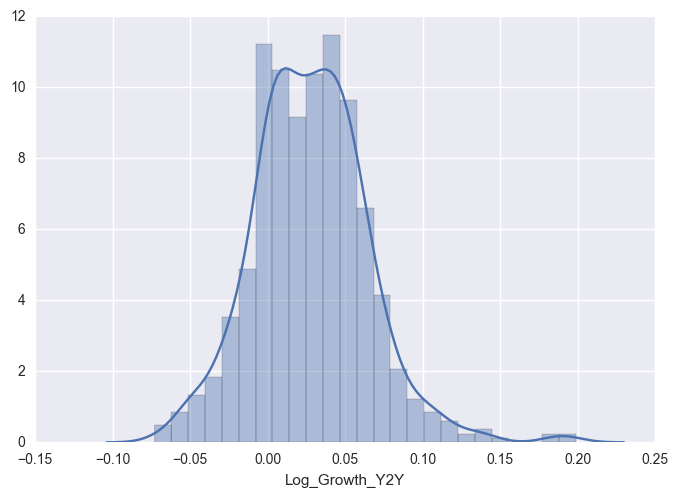

13
105
446
166
24


In [91]:
import math
sns.distplot(zip_aggregated['Log_Growth_Y2Y'].dropna())
plt.show()

print(sum(zip_aggregated['Log_Growth_Y2Y']<-0.05))
print(sum((zip_aggregated['Log_Growth_Y2Y']>=-0.05)&(zip_aggregated['Log_Growth_Y2Y']<0)))
print(sum((zip_aggregated['Log_Growth_Y2Y']>=0)&(zip_aggregated['Log_Growth_Y2Y']<0.05)))
print(sum((zip_aggregated['Log_Growth_Y2Y']>=0.05)&(zip_aggregated['Log_Growth_Y2Y']<0.10)))
print(sum((zip_aggregated['Log_Growth_Y2Y']>=0.1)))


In [45]:
zip_aggregated['Log_Growth_Y2Y'] = Growth_Y2Y

In [46]:
zip_aggregated = zip_aggregated.reset_index()
zip_aggregated

,index,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,...,stars_5,stars,reviews_perc,prev_stars,MedPrice_sqft(t),MedPrice_sqft_tminus1,MedPrice_sqft_tminus2,MedPrice_sqft_tplus1,Growth_Y2Y,Log_Growth_Y2Y
0,0,15003,2008,2.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.500000,4.500000,0.001061,NaN,57.0,57.0,57.0,55.5,0.973684,-0.026668
1,1,15003,2009,0.500000,0.000000,0.500000,2.000000,0.000000,0.000000,0.000000,...,0.500000,4.500000,0.000553,4.500000,55.5,57.0,57.0,57.5,1.036036,0.035402
2,2,15003,2010,1.625000,0.375000,0.375000,2.400000,0.000000,0.000000,0.125000,...,0.375000,4.250000,0.001275,4.500000,57.5,55.5,57.0,54.0,0.939130,-0.062801
3,3,15003,2011,1.200000,0.200000,0.466667,2.400000,0.066667,0.000000,0.066667,...,0.733333,4.466667,0.001285,4.250000,54.0,57.5,55.5,55.5,1.027778,0.027399
4,4,15003,2012,1.800000,0.450000,0.800000,2.111111,0.150000,0.100000,0.050000,...,0.400000,3.700000,0.001196,4.466667,55.5,54.0,57.5,57.0,1.027027,0.026668
5,5,15003,2013,0.840000,0.560000,0.640000,1.888889,0.080000,0.120000,0.040000,...,0.440000,3.920000,0.001188,3.700000,57.0,55.5,54.0,57.0,1.000000,0.000000
6,6,15003,2014,0.764706,0.176471,0.205882,2.071429,0.058824,0.029412,0.058824,...,0.705882,4.411765,0.001180,3.920000,57.0,57.0,55.5,58.0,1.017544,0.017392
7,7,15003,2015,0.901639,0.327869,0.475410,2.076923,0.098361,0.049180,0.032787,...,0.688525,4.262295,0.001568,4.411765,58.0,57.0,57.0,65.0,1.120690,0.113944
8,8,15003,2016,0.319444,0.083333,0.194444,2.117647,0.041667,0.041667,0.055556,...,0.625000,4.361111,0.001638,4.262295,65.0,58.0,57.0,66.0,1.015385,0.015267
9,9,15003,2017,0.000000,0.000000,0.000000,2.666667,0.000000,0.250000,0.000000,...,0.000000,3.500000,0.001601,4.361111,66.0,65.0,58.0,NaN,NaN,NaN


In [54]:
train_data = zip_aggregated[zip_aggregated['Years']<2015].dropna()
test_data = zip_aggregated[zip_aggregated['Years']>=2015].dropna()
test_data

,index,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,...,stars_5,stars,reviews_perc,prev_stars,MedPrice_sqft(t),MedPrice_sqft_tminus1,MedPrice_sqft_tminus2,MedPrice_sqft_tplus1,Growth_Y2Y,Log_Growth_Y2Y
7,7,15003,2015,0.901639,0.327869,0.475410,2.076923,0.098361,0.049180,0.032787,...,0.688525,4.262295,0.001568,4.411765,58.0,57.0,57.0,65.0,1.120690,0.113944
8,8,15003,2016,0.319444,0.083333,0.194444,2.117647,0.041667,0.041667,0.055556,...,0.625000,4.361111,0.001638,4.262295,65.0,58.0,57.0,66.0,1.015385,0.015267
11,11,15009,2015,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000026,5.000000,111.0,104.5,98.0,116.0,1.045045,0.044060
12,12,15009,2016,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000023,1.000000,116.0,111.0,104.5,116.5,1.004310,0.004301
18,18,15015,2015,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000026,5.000000,133.0,126.5,119.0,143.5,1.078947,0.075986
19,19,15015,2016,0.500000,0.500000,0.000000,1.000000,0.500000,0.000000,0.000000,...,0.500000,3.000000,0.000045,1.000000,143.5,133.0,126.5,148.5,1.034843,0.034250
28,28,15017,2015,0.666667,0.139089,0.263789,1.773585,0.179856,0.103118,0.143885,...,0.352518,3.462830,0.010716,3.460674,109.5,104.0,101.0,115.5,1.054795,0.053346
29,29,15017,2016,0.536545,0.139535,0.272425,1.750000,0.191030,0.131229,0.101329,...,0.373754,3.436877,0.013693,3.462830,115.5,109.5,104.0,119.0,1.030303,0.029853
37,37,15024,2015,0.333333,0.222222,0.111111,1.625000,0.444444,0.222222,0.000000,...,0.333333,2.555556,0.000231,3.217391,99.0,96.5,92.0,100.0,1.010101,0.010050
38,38,15024,2016,0.413793,0.137931,0.206897,1.555556,0.172414,0.034483,0.172414,...,0.379310,3.620690,0.000660,2.555556,100.0,99.0,96.5,102.5,1.025000,0.024693


In [69]:
x_train = train_data[train_data.columns[2:17]]
y_train = train_data['Growth_Y2Y']
x_test = test_data[test_data.columns[2:17]]
y_test = test_data['Growth_Y2Y']

In [56]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
#The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

('Coefficients: \n', array([  6.09596214e-01,  -4.13006372e-01,  -5.86596511e-01,
         9.87889863e-01,   2.37244038e-02,   3.14994549e-02,
        -1.20203047e-01,   6.76483575e-01,  -8.58185867e-01,
         2.70405884e-01,  -2.60169962e-01,   3.52623710e+01,
         2.08445606e-01,   1.07350639e+00,  -4.11730739e-02]))
Mean squared error: 11.48
Variance score: 0.99


In [58]:
regr.predict(x_test)

array([  61.48039982,   69.52353454,  117.36924423,  122.24486087,
        140.08057724,  149.93686855,  115.05832368,  122.04546368,
        103.92628512,  105.15159639,   60.51689502,   67.47960996,
         54.51043201,   59.70274275,   50.17502206,   53.27576062,
         86.11037931,   90.00936607,  134.00258654,  141.42880822,
         41.12953358,   42.90596745,  117.93804531,   71.64538105,
         80.81842387,  117.61819904,  126.13531929,   83.16362286,
         85.09467274,   94.64732924,  100.56650692,  117.24219462,
        125.82504288,  110.49155604,  119.15150775,  143.05686994,
        150.63650685,  128.66711201,  136.24589522,  117.39089424,
        127.22757253,   35.91461946,   36.85047827,   92.23932411,
        101.50931158,  116.83792164,  125.46636822,   43.88485391,
         48.60845102,  119.27423221,  127.46046764,   57.54089636,
         61.35764116,   71.89148093,   77.51646868,  109.61712715,
        118.61732794,  113.6820772 ,  122.62531621,   77.02064

In [59]:
y_test

7        65.0
8        66.0
11      116.0
12      116.5
18      143.5
19      148.5
28      115.5
29      119.0
37      100.0
38      102.5
46       63.0
47       66.5
58       55.5
59       58.0
65       49.5
66       50.5
73       85.0
74       91.5
90      134.5
91      139.5
96       39.5
97       42.0
107     113.5
116      76.0
117      76.5
123     119.5
124     124.0
130      80.0
131      83.0
147      95.0
        ...  
811      72.0
812      73.0
821     109.0
822     113.5
833      69.5
834      71.5
845     114.0
846     117.5
857     129.5
858     135.0
868     151.0
869     159.5
878     104.0
879     109.0
894     138.5
895     144.0
902     131.5
903     138.0
980     107.0
981     108.0
992     129.0
993     130.5
1001    124.5
1002    128.0
1010    113.0
1011    115.0
1023    112.0
1024    113.0
1028    151.0
1029    154.0
Name: MedPrice_sqft_tplus1, dtype: float64

In [74]:
mean_growth = np.repeat(y_train.mean(),len(y_test))
mean_growth

array([ 1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02456703,
        1.02456703,  1.02456703,  1.02456703,  1.02456703,  1.02

In [75]:
np.mean((mean_growth - y_test) ** 2)

0.0024277458204050744

In [121]:
Growth_Y2Y_tminus1 = [(zip_aggregated.ix[i]['MedPrice_sqft(t)']/zip_aggregated.ix[i]['MedPrice_sqft_tminus1'])-1 for i in range(len(zip_aggregated))]
Growth_Y2Y_tminus2 = [(zip_aggregated.ix[i]['MedPrice_sqft_tminus1']/zip_aggregated.ix[i]['MedPrice_sqft_tminus2'])-1 for i in range(len(zip_aggregated))]

In [127]:
t=-1

stars_Y2Y = [zip_aggregated.ix[i]['stars']/zip_aggregated[((zip_aggregated['postal_code'])==(zip_aggregated.ix[i]['postal_code']))&((zip_aggregated['Years'])==(zip_aggregated.ix[i]['Years']+t))]['stars'].values-1 for i in range(len(zip_aggregated))]

In [129]:
stars_Y2Y

[array([], dtype=float64),
 array([ 0.]),
 array([-0.05555556]),
 array([ 0.05098039]),
 array([-0.17164179]),
 array([ 0.05945946]),
 array([ 0.12545018]),
 array([-0.03387978]),
 array([ 0.02318376]),
 array([-0.19745223]),
 array([], dtype=float64),
 array([-0.8]),
 array([ 0.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([-0.1]),
 array([ 0.11111111]),
 array([ 0.]),
 array([-0.8]),
 array([ 2.]),
 array([], dtype=float64),
 array([-0.08333333]),
 array([-0.25]),
 array([ 0.36026936]),
 array([-0.11008338]),
 array([ 0.02526207]),
 array([ 0.00419184]),
 array([ 0.00972288]),
 array([ 0.00062288]),
 array([-0.00749464]),
 array([ 0.05558241]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([-0.34285714]),
 array([ 0.34782609]),
 array([-0.11935484]),
 array([-0.17502787]),
 array([-0.20570571]),
 array([ 0.4167916]),
 array([ 0.24285714]),
 array([], dtype=float64),
 array([ 0.33333333]),
 array([-0.28]),
 array([ 0.19047619]),
 array([-0.19791667]),

In [130]:
zip_aggregated['stars_Y2Y'] = stars_Y2Y
zip_aggregated

,index,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,...,stars,reviews_perc,prev_stars,MedPrice_sqft(t),MedPrice_sqft_tminus1,MedPrice_sqft_tminus2,MedPrice_sqft_tplus1,Growth_Y2Y,Log_Growth_Y2Y,stars_Y2Y
0,0,15003,2008,2.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.000000,...,4.500000,0.001061,NaN,57.0,57.0,57.0,55.5,0.973684,-0.026668,[]
1,1,15003,2009,0.500000,0.000000,0.500000,2.000000,0.000000,0.000000,0.000000,...,4.500000,0.000553,4.500000,55.5,57.0,57.0,57.5,1.036036,0.035402,[0.0]
2,2,15003,2010,1.625000,0.375000,0.375000,2.400000,0.000000,0.000000,0.125000,...,4.250000,0.001275,4.500000,57.5,55.5,57.0,54.0,0.939130,-0.062801,[-0.0555555555556]
3,3,15003,2011,1.200000,0.200000,0.466667,2.400000,0.066667,0.000000,0.066667,...,4.466667,0.001285,4.250000,54.0,57.5,55.5,55.5,1.027778,0.027399,[0.0509803921569]
4,4,15003,2012,1.800000,0.450000,0.800000,2.111111,0.150000,0.100000,0.050000,...,3.700000,0.001196,4.466667,55.5,54.0,57.5,57.0,1.027027,0.026668,[-0.171641791045]
5,5,15003,2013,0.840000,0.560000,0.640000,1.888889,0.080000,0.120000,0.040000,...,3.920000,0.001188,3.700000,57.0,55.5,54.0,57.0,1.000000,0.000000,[0.0594594594595]
6,6,15003,2014,0.764706,0.176471,0.205882,2.071429,0.058824,0.029412,0.058824,...,4.411765,0.001180,3.920000,57.0,57.0,55.5,58.0,1.017544,0.017392,[0.125450180072]
7,7,15003,2015,0.901639,0.327869,0.475410,2.076923,0.098361,0.049180,0.032787,...,4.262295,0.001568,4.411765,58.0,57.0,57.0,65.0,1.120690,0.113944,[-0.0338797814208]
8,8,15003,2016,0.319444,0.083333,0.194444,2.117647,0.041667,0.041667,0.055556,...,4.361111,0.001638,4.262295,65.0,58.0,57.0,66.0,1.015385,0.015267,[0.0231837606838]
9,9,15003,2017,0.000000,0.000000,0.000000,2.666667,0.000000,0.250000,0.000000,...,3.500000,0.001601,4.361111,66.0,65.0,58.0,NaN,NaN,NaN,[-0.197452229299]


In [145]:
zip_matrix.head()

,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,stars_4,stars_5,stars
0,15071,2016,0,0,0,3.0,1.0,0.0,0.0,0.0,0.0,1
1,15071,2016,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,5
2,15071,2016,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,5
3,15071,2016,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,5
4,15237,2015,4,0,0,2.0,1.0,0.0,0.0,0.0,0.0,1


In [161]:
#Median
median_values = zip_matrix.groupby(['postal_code', 'Years']).agg(pd.Series.median)

#StdDev
std_values = zip_matrix.groupby(['postal_code', 'Years']).agg(pd.Series.std)

In [163]:
median_values

useful  funny  cool  Price  stars_1  stars_2  stars_3  \
postal_code Years                                                          
15003       2008      2.0    0.5   2.0    3.0      0.0      0.0      0.0   
            2009      0.5    0.0   0.5    2.0      0.0      0.0      0.0   
            2010      1.5    0.0   0.0    2.5      0.0      0.0      0.0   
            2011      0.0    0.0   0.0    3.0      0.0      0.0      0.0   
            2012      1.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2013      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2014      0.5    0.0   0.0    2.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2016      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2017      0.0    0.0   0.0    3.0      0.0      0.0      0.0   
15009       2014      1.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      1.0      0.0      0.0   
            2016      0.0    0.0   0.0    2.0      1.0      0.0      0.0   
15012       2015      0.0    0.0   0.0    1.0      0.0      0.0      0.0   
15015       2011      1.0    0.0   1.0    2.0      0.0      0.0      0.0   
            2012      0.0    0.5   1.0    1.5      0.0      0.0      0.0   
            2013      0.0    0.0   1.0    2.0      0.0      0.0      0.0   
            2014      0.0    0.0   0.0    1.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      1.0      0.0      0.0   
            2016      0.5    0.5   0.0    1.0      0.5      0.0      0.0   
15017       2007      1.0    0.0   0.0    2.0      0.0      0.0      0.5   
            2008      0.0    0.0   0.0    1.0      0.0      0.0      0.0   
            2009      2.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2010      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2011      1.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2012      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2013      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2014      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2016      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
...                   ...    ...   ...    ...      ...      ...      ...   
15321       2014      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2016      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2017      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
15332       2006      1.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2010      9.0    3.0   9.0    2.0      0.0      0.0      0.0   
            2011      1.5    0.0   1.0    2.0      0.0      0.0      0.5   
            2012      1.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2013      1.0    0.0   0.0    1.5      0.0      0.0      0.0   
            2014      2.0    0.0   1.0    2.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2016      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2017      0.0    0.0   0.0    2.0      1.0      0.0      0.0   
15339       2011      2.0    0.5   1.0    2.0      0.0      0.0      0.0   
            2012      0.0    1.0   0.0    2.0      0.0      0.0      0.0   
            2013      0.0    0.5   0.5    2.0      0.0      0.5      0.0   
            2014      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
            2015      0.0    0.0   0.0    2.0      0.0      0.0      1.0   
            2016      0.0    0.0   0.0    2.0      0.0      0.0      0.0   
15342       2011      1.5    0.0   0.0    1.0      0.0      0.0    

In [154]:
zip_aggregated = zip_aggregated.join(median_values, on = ['postal_code', 'Years'], how = "left", rsuffix="_median")

In [155]:
zip_aggregated = zip_aggregated.join(std_values, on = ['postal_code', 'Years'], how = "left", rsuffix="_std")

In [156]:
zip_aggregated

,index,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,...,useful_std,funny_std,cool_std,Price_std,stars_1_std,stars_2_std,stars_3_std,stars_4_std,stars_5_std,stars_std
0,0,15003,2008,2.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.000000,...,2.828427,0.707107,0.000000,NaN,0.000000,0.000000,0.000000,0.707107,0.707107,0.707107
1,1,15003,2009,0.500000,0.000000,0.500000,2.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.707107,NaN,0.000000,0.000000,0.000000,0.707107,0.707107,0.707107
2,2,15003,2010,1.625000,0.375000,0.375000,2.400000,0.000000,0.000000,0.125000,...,1.187735,0.744024,0.744024,0.547723,0.000000,0.000000,0.353553,0.534522,0.517549,0.707107
3,3,15003,2011,1.200000,0.200000,0.466667,2.400000,0.066667,0.000000,0.066667,...,1.698739,0.414039,0.990430,0.849837,0.258199,0.000000,0.258199,0.351866,0.457738,1.125463
4,4,15003,2012,1.800000,0.450000,0.800000,2.111111,0.150000,0.100000,0.050000,...,3.994733,1.571958,2.894641,0.798809,0.366348,0.307794,0.223607,0.470162,0.502625,1.490320
5,5,15003,2013,0.840000,0.560000,0.640000,1.888889,0.080000,0.120000,0.040000,...,2.075251,2.042874,1.524248,0.654654,0.276887,0.331662,0.200000,0.476095,0.506623,1.320353
6,6,15003,2014,0.764706,0.176471,0.205882,2.071429,0.058824,0.029412,0.058824,...,0.923065,0.869364,0.410426,0.735868,0.238833,0.171499,0.238833,0.359491,0.462497,1.131308
7,7,15003,2015,0.901639,0.327869,0.475410,2.076923,0.098361,0.049180,0.032787,...,2.150232,1.491323,1.747442,0.596285,0.300273,0.218039,0.179556,0.340363,0.466940,1.327926
8,8,15003,2016,0.319444,0.083333,0.194444,2.117647,0.041667,0.041667,0.055556,...,0.688464,0.325014,0.619834,0.654526,0.201229,0.201229,0.230669,0.427672,0.487520,1.052235
9,9,15003,2017,0.000000,0.000000,0.000000,2.666667,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.577350,0.000000,0.500000,0.000000,0.500000,0.000000,1.000000


In [157]:
len(zip_aggregated.dropna())

609